### ***TP3: Machine Learning with python using keras***

# **Etape 1: Importation des bibliothèques**

In [1]:
import tensorflow as tf
from tensorflow import keras
#import keras
from keras.datasets import mnist # import the function mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout # Dense = Fully Connected layer.
from tensorflow.keras.optimizers import RMSprop,Adam
import matplotlib.pyplot as plt

## **Etape 2 : PREPARATION DU RESEAU ET DES DONNEES**

*-Fixer quelques caractéristiques : Nombre de classes nombre d’époques et le nombre de patch size.*


In [2]:
batch_size = 128
num_classes = 10
epochs = 100

*-Charger la base d’apprentissage et de test:*


In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 34s 3us/step


*-Vérifier le chargement des données:*

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


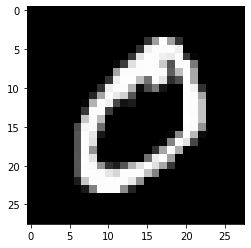

In [5]:
plt.imshow(x_train[1,:,:], cmap = 'gray')

*-Changement du type des données et application d’une normalisation:*

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0],"train samples")
print(x_test.shape[0],"test samples")

60000 train samples
10000 test samples


*-Adaptation de la classe de sortie à la couche de sortie du réseau*

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[1,:])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## **Etape 3: CONSTRUCTION DU MODELE NEURONAL ET APPLICATION DE L’APPRENTISSAGE**

*− Construction du modèle neuronal avec 1 couche d’entrée, 2 couches cachées et 1 couche de sortie.*

In [8]:
model = Sequential()
model.add(Dense(200,activation='relu', input_shape=(784,)))
model.add(Dropout(0.4))

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


*− Fixer l’algorithme d’apprentissage*

In [9]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])

*-Effectuer l’apprentissage*

In [10]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size = batch_size, 
                    epochs = epochs, 
                    verbose = 1, 
                    validation_data=(x_test, y_test))

Epoch 1/100
469/469 [==============================] - 6s 12ms/step - loss: 0.4410 - accuracy: 0.8654 - val_loss: 0.1595 - val_accuracy: 0.9498
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.2003 - accuracy: 0.9402 - val_loss: 0.1123 - val_accuracy: 0.9649
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1537 - accuracy: 0.9536 - val_loss: 0.0967 - val_accuracy: 0.9704
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1280 - accuracy: 0.9606 - val_loss: 0.0824 - val_accuracy: 0.9760
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1153 - accuracy: 0.9648 - val_loss: 0.0785 - val_accuracy: 0.9767
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1043 - accuracy: 0.9677 - val_loss: 0.0742 - val_accuracy: 0.9780
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0929 - accuracy: 0.9707 - val_loss: 0.0746 - val_accuracy: 0.977

## **Etape 4: EVALUATION DU MODELE**

*-Calculer les valeurs loss et précision pour la base de test*

In [11]:
score = model.evaluate(x_test, y_test, 
                    verbose = 1,
                    batch_size = batch_size)

print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

79/79 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 0.9838
Test loss:  0.09023809432983398
Test accuracy:  0.9837999939918518


*-Construire la courbe d’accuracy en fonction du nombre d’époques*


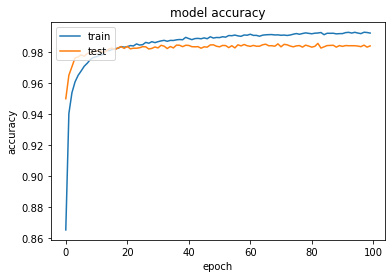

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc="upper left")
plt.show()

*-Construire la courbe loss en fonction du nombre d’époques*

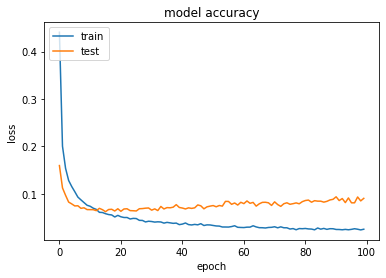

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc="upper left")
plt.show()